In [1]:
# import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../utils/')
from neuralNet import NeuralNet
from search import gridSearchCV
sns.set_style("darkgrid")

from search import ParamGrid

# Loading data



In [2]:
def vectorized_result(j):

    y = np.zeros((10, 1))
    y[j] = 1.0
    return y



data = pd.read_csv('./../data/part1.csv', header=None)

X = np.array(data.iloc[:, :784])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_x = [np.reshape(x, (-1, 1)) for x in X[idx[:frac]]]
train_y = [vectorized_result(y) for y in Y[idx[:frac]]]
train_data = list(zip(train_x, train_y))
test_x = [np.reshape(x, (-1, 1)) for x in X[idx[frac:]]]
test_y = Y[idx[frac:]]
test_data = list(zip(test_x, test_y))


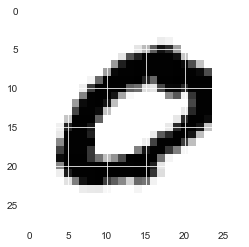

In [4]:
# Visualize data
plt.imshow(X[10].reshape(28,28),cmap=plt.cm.binary)
plt.show()

### Sigmoid Function 

In [12]:
# Working with Sigmoid activation function
model_sigmoid = NeuralNet(size=[784,30,10],cost='cross_entropy_cost',neuron_type='tanh')


# Tuning deciding the epoch and bacth size 
# Grid search CV
# params = {
#     'neuron_type': ['sigmoid'],
#     'epoch': [10],
#     'eta': [1e0],
#     'cost': ['cross_entropy_cost'],
#     'sizes': [[784, 30, 10]],
#     'batch_size': [1, 4, 8, 16],
#     'lmbda': [0]

# }

train_accuracy, train_cost, test_accuracy, test_cost= model_sigmoid.fit(
    train_data, epochs=40, eta=5, test_data=test_data, lmda=0, mini_batch_size=4,verbose=True)




Epoch :37 complete: test_accuracy: 0.4166666666666667 , train_accuracy :0.465
Epoch :38 complete: test_accuracy: 0.4116666666666667 , train_accuracy :0.48291666666666666
Epoch :39 complete: test_accuracy: 0.41833333333333333 , train_accuracy :0.48
Epoch :40 complete: test_accuracy: 0.43166666666666664 , train_accuracy :0.47583333333333333


Text(0.5, -0.05, 'layers [784,30,10] ,eta= 3 , Sigmoid , cross-entropy-loss, batch_size=1 ')

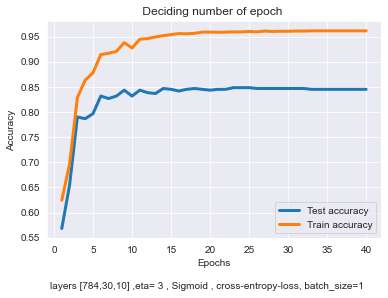

In [9]:
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
             y=test_accuracy, ax=ax, label='Test accuracy',linewidth=3)
sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
             y=train_accuracy, ax=ax, label='Train accuracy',linewidth=3)
ax.set_title(" Deciding number of epoch  ")
# ax.legend(['test_accuracy','train_accuracy','layers [784,30,10] ,eta= 3'])
ax.set_xlabel('Epochs'),ax.set_ylabel('Accuracy')
fig.text(.5, -0.05,
         'layers [784,30,10] ,eta= 3 , Sigmoid , cross-entropy-loss, batch_size=1 ', ha='center')


[784, 30, 10]
[784, 30, 10]
[784, 30, 10]
[784, 30, 10]
[784, 30, 10]


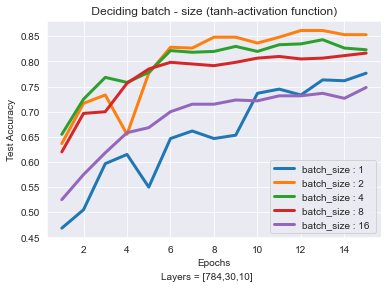

In [10]:
# Hence epoch =25 taken for future reference

# Decidin the batch size 
params = ParamGrid(paramGrid={'batch_size':[1,2,4,8,16],
                            'epoch':[15],
                            'neuron_type':['tanh'],
                            'lmbda':[0],
                            'eta':[0.5],
                            'cost':['cross_entropy_cost'],
                            'layers':[[784,30,10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print(param['layers'])
    nn  = NeuralNet(cost=param['cost'],size=param['layers'],neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)
    
    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                y=test_accuracy, ax=ax, label=   f'batch_size : {param["batch_size"]} ', linewidth=3)

ax.set_title(" Deciding batch - size (tanh-activation function) ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5,-0.02, 'Layers = [784,30,10] ',ha='center')
plt.show()


[784, 30, 10]
[784, 30, 10]
[784, 30, 10]
[784, 30, 10]
[784, 30, 10]


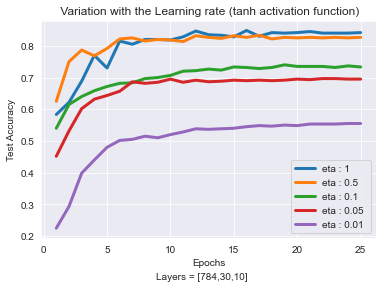

In [11]:
# Batch size= 4 ,epochs =20

# Finding the best learning rate 

params = ParamGrid(paramGrid={'batch_size': [4],
                              'epoch': [25],
                              'neuron_type': ['tanh'],
                              'lmbda': [0],
                              'eta': [1,5e-1,1e-1,5e-2,1e-2],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print(param['layers'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'eta : {param["eta"]} ', linewidth=3)

ax.set_title(" Variation with the Learning rate (tanh activation function)")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5, -0.02, 'Layers = [784,30,10] ', ha='center')
plt.show()



**eta=1 , epochs=20, mini_batch=4**

Training [784, 30, 10]
Training [784, 100, 10]


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))
/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/assignments/assignment_3/P1/../utils/cost_funcs.py:13: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.nan_to_num(-y * np.log(activation_out) - (1-y)*np.log(1-activation_out)))


Training [784, 100, 30, 10]
Training [784, 200, 30, 10]


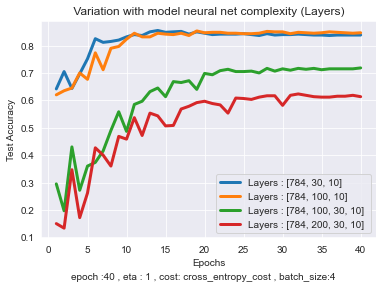

In [16]:
#  tuning the number of hidden layers and sizes 

params = ParamGrid(paramGrid={'batch_size': [4],
                              'epoch': [40],
                              'neuron_type': ['tanh'],
                              'lmbda': [0],
                              'eta': [1],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 30, 10],  [784,100, 10],[784,100,30, 10], [784, 200,30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print('Training',  param['layers'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'Layers : {param["layers"]} ', linewidth=3)

ax.set_title(" Variation with model neural net complexity (Layers) ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')

fig.text(0.5, -0.02, f'epoch :{param["epoch"]} , eta : {param["eta"]} , cost: {param["cost"]} , batch_size:{param["batch_size"]}', ha='center')
plt.show()


Training lmbda 0
Training lmbda 0.1
Training lmbda 0.01
Training lmbda 0.001
Training lmbda 0.0001
Training lmbda 1e-05


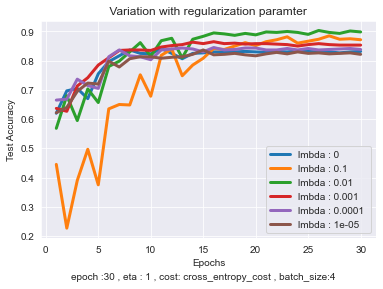

In [18]:
# Tuning the paramter lmbda
params = ParamGrid(paramGrid={'batch_size': [4],
                              'epoch': [30],
                              'neuron_type': ['tanh'],
                              'lmbda': [0,1e-1,1e-2,1e-3,1e-4,1e-5],
                              'eta': [1],
                              'cost': ['cross_entropy_cost'],
                              'layers': [[784, 30, 10]]})

fig, ax = plt.subplots()
for param in params.iterate():
    print('Training lmbda',  param['lmbda'])
    nn = NeuralNet(cost=param['cost'], size=param['layers'],
                   neuron_type=param['neuron_type'])
    train_accuracy, train_cost, test_accuracy, test_cost = nn.fit(
        train_data, epochs=param['epoch'], eta=param['eta'], test_data=test_data, lmda=param['lmbda'], mini_batch_size=param['batch_size'], verbose=False)

    sns.lineplot(x=np.arange(1, len(test_accuracy)+1),
                 y=test_accuracy, ax=ax, label=f'lmbda : {param["lmbda"]} ', linewidth=3)

ax.set_title(" Variation with regularization paramter ")
ax.set_xlabel('Epochs'), ax.set_ylabel('Test Accuracy')
# ax.set_yticks(np.arange(0.0,1.1,0.1))

fig.text(0.5, -0.02,
         f'epoch :{param["epoch"]} , eta : {param["eta"]} , cost: {param["cost"]} , batch_size:{param["batch_size"]}', ha='center')
plt.show()


In [19]:
# Grid_search
params = {
    'batch_size': [4],
    'epoch': [20],
    'neuron_type': ['tanh'],
    'lmbda': [1e-1, 5e-2, 1e-2,5e-3],
    'eta': [0.5],
    'cost': ['cross_entropy_cost'],
    'sizes': [[784, 30, 10], [784, 100, 10]]
}

gg = gridSearchCV(params)
gg.fit(X, Y)


Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 20, 'eta': 0.5, 'lmbda': 0.1, 'neuron_type': 'tanh', 'sizes': [784, 30, 10]}
Scores :  {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 20, 'eta': 0.5, 'lmbda': 0.1, 'neuron_type': 'tanh', 'sizes': [784, 30, 10], 'train_accuracy': 0.9109999999999999, 'train_cost': 0.9524652168003167, 'test_accuracy': 0.875, 'test_cost': 1.0702701350189765}
Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 20, 'eta': 0.5, 'lmbda': 0.1, 'neuron_type': 'tanh', 'sizes': [784, 100, 10]}
Scores :  {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 20, 'eta': 0.5, 'lmbda': 0.1, 'neuron_type': 'tanh', 'sizes': [784, 100, 10], 'train_accuracy': 0.9114166666666668, 'train_cost': 0.8523596306091568, 'test_accuracy': 0.88, 'test_cost': 0.9647579287403945}
Configuration : {'batch_size': 4, 'cost': 'cross_entropy_cost', 'epoch': 20, 'eta': 0.5, 'lmbda': 0.05, 'neuron_type': 'tanh', 'sizes': [784, 30, 10]}
Sc

In [20]:
# visaulizing the grid cv results
cv_results =pd.DataFrame(gg.cv_results)
# cv_results['sizes'] = [ ele[1:-1] for ele in cv_results['sizes']]
cv_results['layers'] = [','.join(map(str, l)) for l in cv_results['sizes']]
cv_results


,batch_size,cost,epoch,eta,lmbda,neuron_type,sizes,train_accuracy,train_cost,test_accuracy,test_cost,layers
0,4,cross_entropy_cost,20,0.5,0.010,tanh,"[784, 100, 10]",0.999333,0.136347,0.932667,0.516570,"784,100,10"
1,4,cross_entropy_cost,20,0.5,0.005,tanh,"[784, 100, 10]",1.000000,0.079949,0.921000,0.599693,"784,100,10"
2,4,cross_entropy_cost,20,0.5,0.010,tanh,"[784, 30, 10]",0.987417,0.234047,0.914667,0.617634,"784,30,10"
3,4,cross_entropy_cost,20,0.5,0.050,tanh,"[784, 100, 10]",0.942417,0.573928,0.913000,0.751973,"784,100,10"
4,4,cross_entropy_cost,20,0.5,0.005,tanh,"[784, 30, 10]",0.986333,0.192534,0.910000,0.671540,"784,30,10"
5,4,cross_entropy_cost,20,0.5,0.050,tanh,"[784, 30, 10]",0.940083,0.656192,0.903667,0.834422,"784,30,10"
6,4,cross_entropy_cost,20,0.5,0.100,tanh,"[784, 100, 10]",0.911417,0.852360,0.890000,0.964758,"784,100,10"
7,4,cross_entropy_cost,20,0.5,0.100,tanh,"[784, 30, 10]",0.911000,0.952465,0.885000,1.070270,"784,30,10"


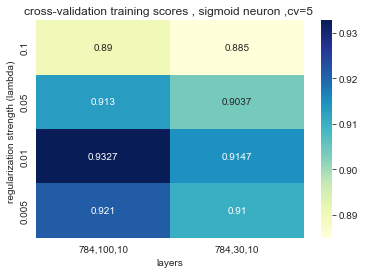

In [22]:
plt.figure()
ax = sns.heatmap(cv_results.pivot('lmbda', 'layers', 'test_accuracy'),
                 annot=True, cmap='YlGnBu', fmt='.4g')
ax.set_title('cross-validation training scores , sigmoid neuron ,cv=5 ')
ax.set_xlabel('layers'), ax.invert_yaxis()

ax.set_ylabel('regularization strength (lambda) ')
plt.show()


In [41]:
X = np.array(data.iloc[:, :784])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_x = [np.reshape(x, (-1, 1)) for x in X[idx[:frac]]]
train_y = [vectorized_result(y) for y in Y[idx[:frac]]]
train_data = list(zip(train_x, train_y))
test_x = [np.reshape(x, (-1, 1)) for x in X[idx[frac:]]]
test_y = Y[idx[frac:]]
test_data = list(zip(test_x, test_y))


In [46]:
# getting the confusion matrix

model = NeuralNet(size=[784, 100, 10],
                  cost='cross_entropy_cost', neuron_type='tanh')

train_accuracy, train_cost, test_accuracy, test_cost = model.fit(train_data=train_data, epochs=15, mini_batch_size=4, eta=0.5, lmda=1e-2, test_data=test_data,verbose=False)


In [47]:
predicted_results = model.predict(test_data)

In [36]:
from sklearn.metrics import confusion_matrix

In [48]:
cf= confusion_matrix(test_y,predicted_results)

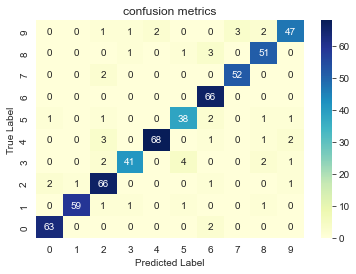

In [49]:
# df= pd.DataFrame(results)
plt.figure()
ax = sns.heatmap(cf,
                 annot=True, cmap='YlGnBu', fmt='.4g')
ax.set_title('confusion metrics')
ax.set_xlabel('Predicted Label'), ax.invert_yaxis()

ax.set_ylabel('True Label')
plt.show()
